<a href="https://colab.research.google.com/github/moatazkrimchi/Data-analyst/blob/main/Analyse_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Importer les packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact,widgets
import folium

In [2]:
# import data
deces_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirme_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
retabli_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
etat_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
print(deces_df.shape)
print(confirme_df.shape)
print(retabli_df.shape)
print(etat_df.shape)

(280, 742)
(280, 742)
(265, 742)
(196, 16)


In [5]:
deces_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7335,7335,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356,7356,7361,7364,7365,7367,7367,7368,7369,7373,7373,7374,7376,7376,7376,7378,7379,7381,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403,7403
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3172,3178,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217,3217,3220,3220,3224,3224,3228,3233,3233,3240,3241,3247,3253,3255,3262,3265,3269,3271,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323,3329
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6190,6198,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276,6284,6291,6298,6303,6310,6318,6325,6330,6339,6349,6363,6372,6383,6393,6404,6412,6423,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539,6545
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137,137,138,139,139,139,139,139,140,140,140,140,140,140,140,141,141,141,141,141,141,141,141,141,141,142,142,142,142,142,142,144,144,144,144,144,145,145,145,145
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1738,1738,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770,1772,1772,1775,1778,1789,1799,1809,1819,1826,1832,1840,1842,1847,1852,1857,1863,1866,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893,1893
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,117,117,117,118,118,118,118,118,118,118,119,119,119,119,119,119,119,119,119,119,120,120,120,120,120,120,120,120,120,121,121,121,122,122,122,122,122,126,127,127
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,116930,116953,116964,116979,117008,117020,117035,117066,117085,117111,117146,117169,117181,117204,117245,117294,117346,117386,117428,117465,117492,117543,117595,117670,117808,117901,117989,118040,118231,118420,118628,118809,118969,119103,119168,119444,119703,120019,120352,120657
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7903,7914,7921,7936,7939,7942,7943,7950,7965,7970,7968,7972,7975,7977,7983,7986,7989,7993,7997,7999,8001,8004,8006,8014,8014,8015,8018,8019,8020,8022,8025,8026,8026,8026,8028,8028,8032,8033,8035,8035
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,18,19,19,20,20,22,22,22,24,25,25,25,26,26
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,645,647,648,649,649,649,652,653,656,657,663,668,669,673,675,684,689,700,709,725,743,754,775,797,826,846,866,883,919,951,976,1022,1052,1096,1110,1139,1168,1196,1231,1315


In [6]:
confirme_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4198,4201,4205,4216,4216,4236,4236,4259,4259,4259,4283,4283,4283,4283,4283,4486,4486,4715,4715,4844,5058,5058,5058,5214,5214,5246,5321,5321,5321,5346,5741,5741,5815,5931,5931,6023,6023,6442,6524,6558
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5395044,5404380,5415501,5428957,5445236,5452419,5460042,5480305,5514207,5556239,5606745,5654408,5674428,5694930,5739326,5820536,5915695,6025303,6135836,6237525,6310844,6399196,6533635,6664717,6793119,6932972,7029624,7094865,7197323,7318305,7446626,7576335,7694506,7792652,7862536,7940657,8041520,8130023,8207752,8271636
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,343708,343845,343997,344126,344261,344379,344481,344540,344649,344737,344826,344930,344980,345007,345036,345126,345255,345389,345518,345713,345855,345981,346224,346811,346811,347084,347377,347617,347785,348145,348708,349329,349957,350897,351711,352399,353731,355662,358218,361754
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2307,2365,2450,2552,2694,2765,2942,3186,3311,3559,3564,4010,4919,5323,5323,7054,8021,9553,9429,12300,13248,13248,15834,17378,19908,21174,22396,23761,23761,27618,28510,28472,29240,30634,31366,31941,33071,33

In [7]:
etat_df.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2022-01-29 16:21:11,33.93911,67.709953,161290,7405,NaN,NaN,414.325388,NaN,NaN,4.591109,4,AFG,2973,47
1,Albania,2022-01-29 16:21:11,41.15330,20.168300,254126,3329,NaN,NaN,8830.565015,NaN,NaN,1.309980,8,ALB,43902,112
2,Algeria,2022-01-29 16:21:11,28.03390,1.659600,247568,6545,NaN,NaN,564.565819,NaN,NaN,2.643718,12,DZA,29136,269
3,Andorra,2022-01-29 16:21:11,42.50630,1.521800,35556,145,NaN,NaN,46018.248884,NaN,NaN,0.407807,20,AND,11816,5
4,Angola,2022-01-29 16:21:11,-11.20270,17.873900,98029,1893,NaN,NaN,298.266295,NaN,NaN,1.931061,24,AGO,16436,123
5,Antigua and Barbuda,2022-01-29 16:21:11,17.06080,-61.796400,6558,127,NaN,NaN,6696.756801,NaN,NaN,1.936566,28,ATG,2275,8
6,Argentina,2022-01-29 16:21:11,-38.41610,-63.616700,8271636,120657,NaN,NaN,18301.789568,NaN,NaN,1.458684,32,ARG,2617228,3488
7,Armenia,2022-01-29 16:21:11,40.06910,45.038200,364348,8041,NaN,NaN,12295.620258,NaN,NaN,2.206956,51,ARM,16824,63
8,Australia,2022-01-29 16:21:11,-25.00000,133.000000,2534150,3631,NaN,NaN,9953.573687,NaN,NaN,0.143283,36,AUS,2097769,1379
9,Austria,2022-01-29 16:21:11,47.51620,14.550100,1801040,14077,NaN,NaN,19997.335228,NaN,NaN,0.781604,40,AUT,487673,328


In [46]:
etat_df[etat_df['Country_Region']=='Morocco']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
121,Morocco,2022-01-29 16:21:11,31.7917,-7.0926,1124986,15300,NaN,NaN,3047.870477,NaN,NaN,1.360017,504,MAR,161894,451


In [9]:
etat_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'],
      dtype='object')

In [16]:
# afficher les statistiques au niveau monde 
global_data = etat_df.copy().drop(['Country_Region','Recovered','Last_Update', 'Lat', 'Long_', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'],axis=1)
global_synthese = pd.DataFrame(global_data.sum()).transpose()

In [17]:
global_synthese

,Confirmed,Deaths
0,370849359,5652965


In [37]:
# visualiser les payes le splus touchés
fig = go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r='background-color:red'
  y='background-color:blue'
  g='background-color:grey'
  df1 = pd.DataFrame('', index = x.index, columns = x.columns)
  df1.iloc[:,4] = y
  df1.iloc[:,5] = r
  df1.iloc[:,6] = g

  return df1

def show_cases(n):
  n=int(n)
  return etat_df.sort_values('Confirmed',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases,n='10')


interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.show_cases>

In [22]:
etat_class_df= etat_df.sort_values('Confirmed',ascending=False)
etat_class_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'],
      dtype='object')

In [26]:

px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Confirmed',
  title='Les 10 pays les plus touchés par coronavirus (cas confirmés)',
  color_discrete_sequence=['yellow'],
  height=500,
  width=800
)

In [29]:

px.bar(
   etat_class_df.head(10),
   x= 'Country_Region',
   y= 'Deaths',
  title='Les 10 pays les plus touchés par coronavirus (cas decès)',
  color_discrete_sequence=['pink'],
  height=500,
  width=800
)

In [48]:
# Visualiser les données sur une carte
m=folium.Map(location=[31.7917,-7.0926],zoom_start=6, max_zoom=12,min_zoom=2)
m

In [49]:
# Visualiser la situation dans un pays (maroc)
conf_mar=confirme_df[confirme_df['Country/Region']=='Morocco']
deces_mar=deces_df[deces_df['Country/Region']=='Morocco']


In [50]:
# Préparation des données (MAroc)
conf_mar=conf_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
deces_mar=deces_mar.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()


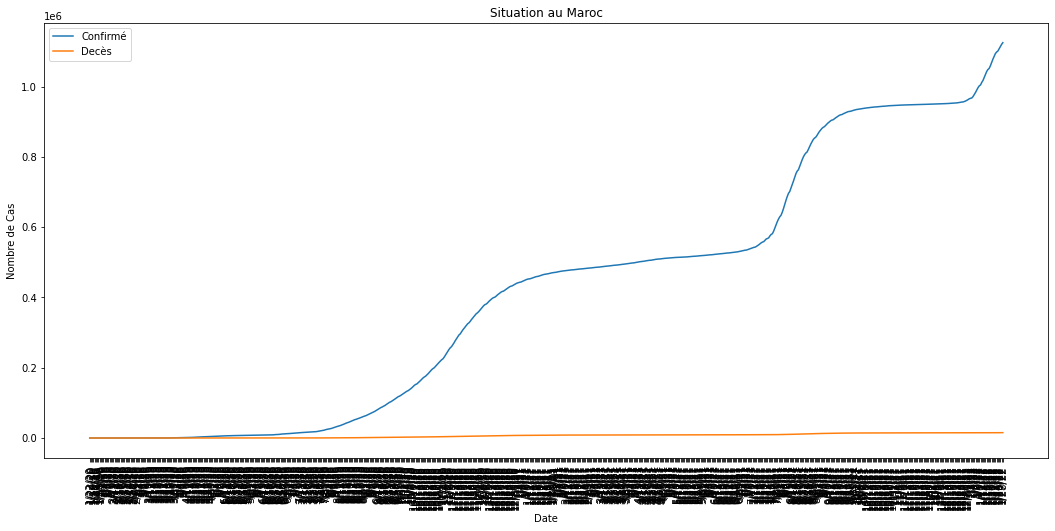

In [54]:
# Dessin de la courbe
fig,ax=plt.subplots(figsize=(18,8))
ax.plot(conf_mar.index,conf_mar.values,label='Confirmé')
ax.plot(deces_mar.index,deces_mar.values,label='Decès')


plt.xticks(rotation='vertical')
ax.set(xlabel='Date',ylabel='Nombre de Cas',title='Situation au Maroc')
plt.legend()